In [1]:
# Installing Libraries
!pip install pandas
!pip install seaborn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Fetching dataset
sales_df = pd.read_excel("D:/AFame Tech/Sales/ECOMM DATA.xlsx", engine='openpyxl')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# Data Preprocessing

In [18]:
sales_df.duplicated().sum()

0

In [3]:
sales_df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [11]:
sales_df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [76]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)  

# Handle missing values for 'Postal Code' column
sales_df['Postal Code'] = imputer.fit_transform(sales_df[['Postal Code']])

In [13]:
sales_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

# Total Sales

In [24]:
total_sales = sales_df['Sales'].sum()
print("Total Sales: $", total_sales)

Total Sales: $ 12642501.909880001


# Analysing Sales Trends

In [74]:
from matplotlib.ticker import ScalarFormatter
sales_df['Order Year'] = sales_df['Order Date'].dt.year
yearly_sales = sales_df.groupby('Order Year')['Sales'].sum()
yearly_sales_table = pd.DataFrame(yearly_sales)
yearly_sales_table.columns = ['Total Sales']
pd.options.display.float_format = '{:.2f}'.format

In [75]:
# Total Sales of each year
print("Total Sales for Each Year:")
print(yearly_sales_table)

Total Sales for Each Year:
            Total Sales
Order Year             
2011         2259450.90
2012         2677438.69
2013         3405746.45
2014         4299865.87


C:\Users\shrey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shrey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


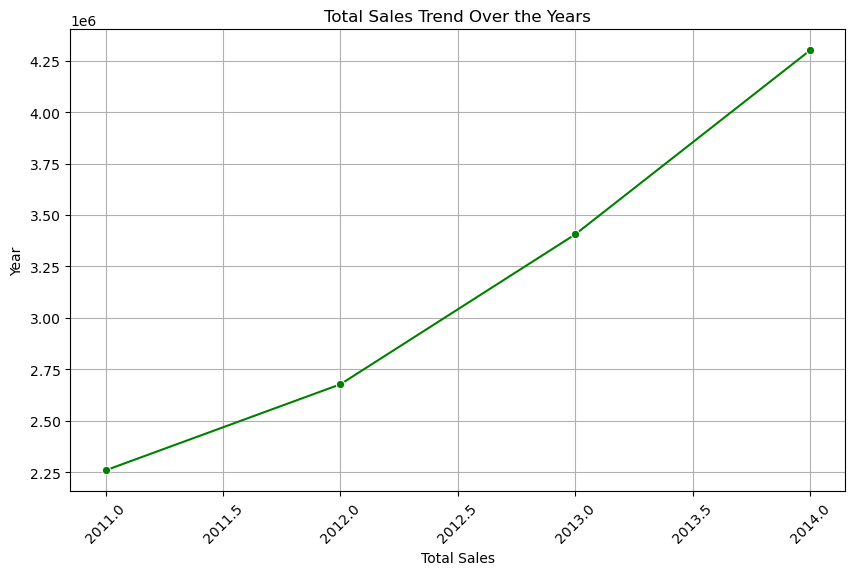

In [50]:
# Sales trend on the basis of years present in the dataset

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, marker='o', color='green')
plt.title('Total Sales Trend Over the Years')
plt.ylabel('Year')
plt.xlabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

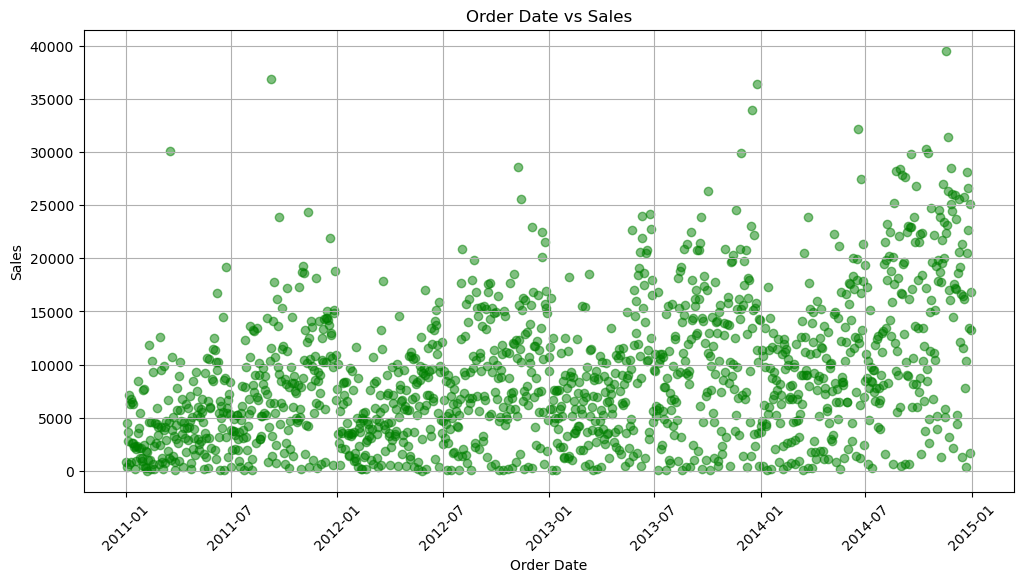

In [52]:
# Sales Trend based on the course of all time

plt.figure(figsize=(12, 6))
plt.scatter(sales_df['Order Date'], sales_df['Sales'], color='green', alpha=0.5)
plt.title('Order Date vs Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Best Selling Products

In [57]:
sales_df.columns

Index(['Order Date', 'Sales', 'Order Year'], dtype='object')

In [58]:
# Reloading the dataset from the source file to retain the columns and calculate top selling products.
sales_df = pd.read_excel("D:/AFame Tech/Sales/ECOMM DATA.xlsx", engine='openpyxl')

In [73]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)  

# Handle missing values for 'Postal Code' column
sales_df['Postal Code'] = imputer.fit_transform(sales_df[['Postal Code']])

In [60]:
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [72]:
# Group by product name to calculate the total sales for each product
product_sales = sales_df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_products = product_sales.head(10)

In [68]:
print("Top 10 Best-Selling Products:")
print(top_products)

Top 10 Best-Selling Products:
Product Name
Apple Smart Phone, Full Size                               86935.78
Cisco Smart Phone, Full Size                               76441.53
Motorola Smart Phone, Full Size                            73156.30
Nokia Smart Phone, Full Size                               71904.56
Canon imageCLASS 2200 Advanced Copier                      61599.82
Hon Executive Leather Armchair, Adjustable                 58193.48
Office Star Executive Leather Armchair, Adjustable         50661.68
Harbour Creations Executive Leather Armchair, Adjustable   50121.52
Samsung Smart Phone, Cordless                              48653.46
Nokia Smart Phone, with Caller ID                          47877.79
Name: Sales, dtype: float64


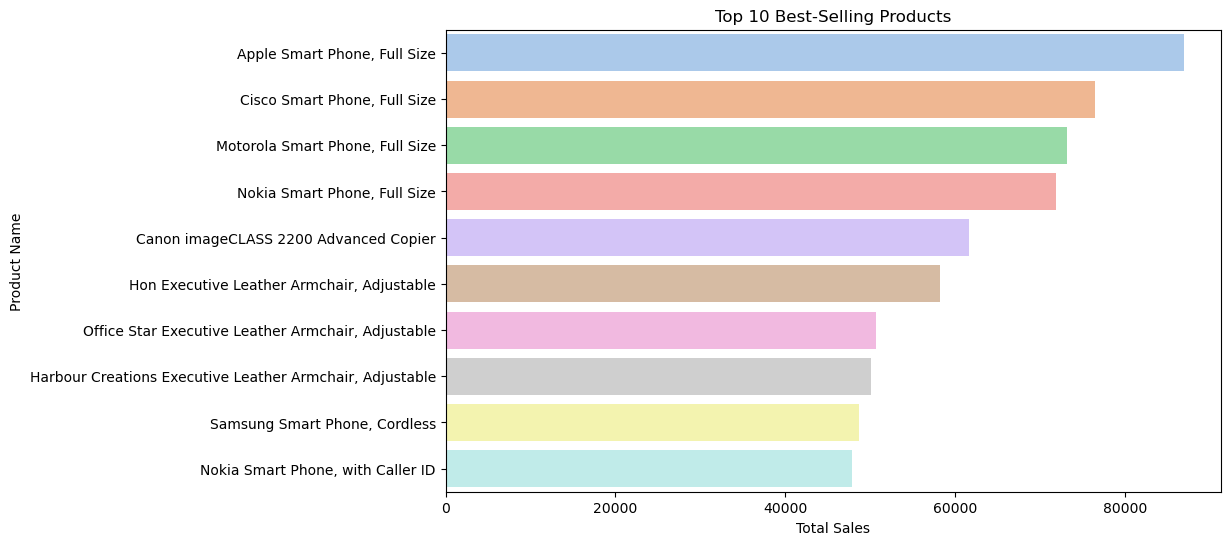

In [70]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='pastel')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()